In [96]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("diabetes.csv")

In [98]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.shape

(768, 9)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
# identifying and replaceing the zero valus with it's median
zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# checking how many zeros exist
(df[zero_columns] == 0).sum()

# Zero values in these medical measurements are biologically implausible and represent missing data rather than true zeros.

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

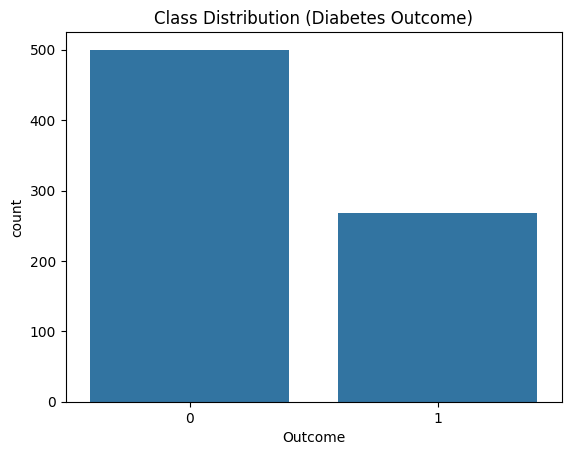

In [103]:
# exploratory data analysis
sns.countplot(x='Outcome', data = df)
plt.title("Class Distribution (Diabetes Outcome)")
plt.show()

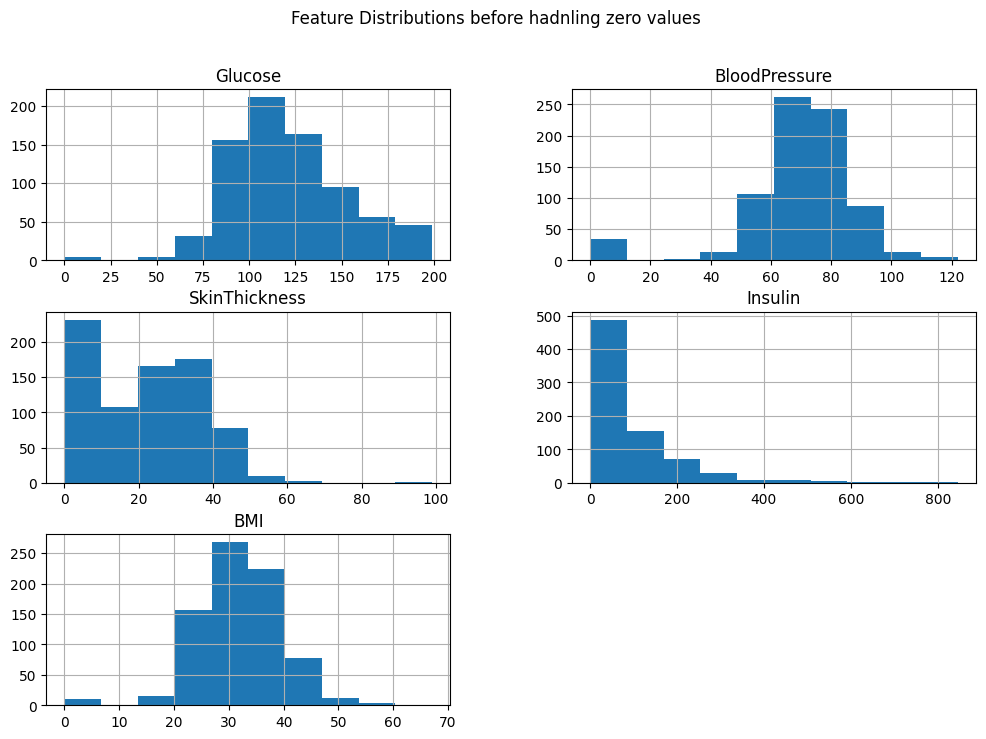

In [104]:
# Distribution of key features (before cleaning)
df[zero_columns].hist(figsize=(12,8))
plt.suptitle("Feature Distributions before hadnling zero values")
plt.show()

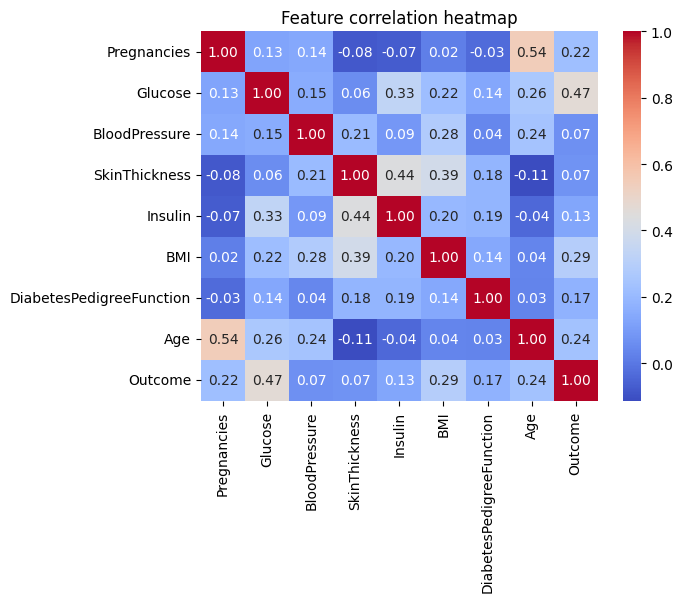

In [105]:
# correlation heatmap
plt.Figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True, cmap="coolwarm", fmt=".2f")
plt.title("Feature correlation heatmap")
plt.show()

In [106]:
# replacing 0 values with MEDIAN 
for col in zero_columns:
    median_values = df[col].median()
    df[col] = df[col].replace(0, median_values)

In [107]:
(df[zero_columns] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

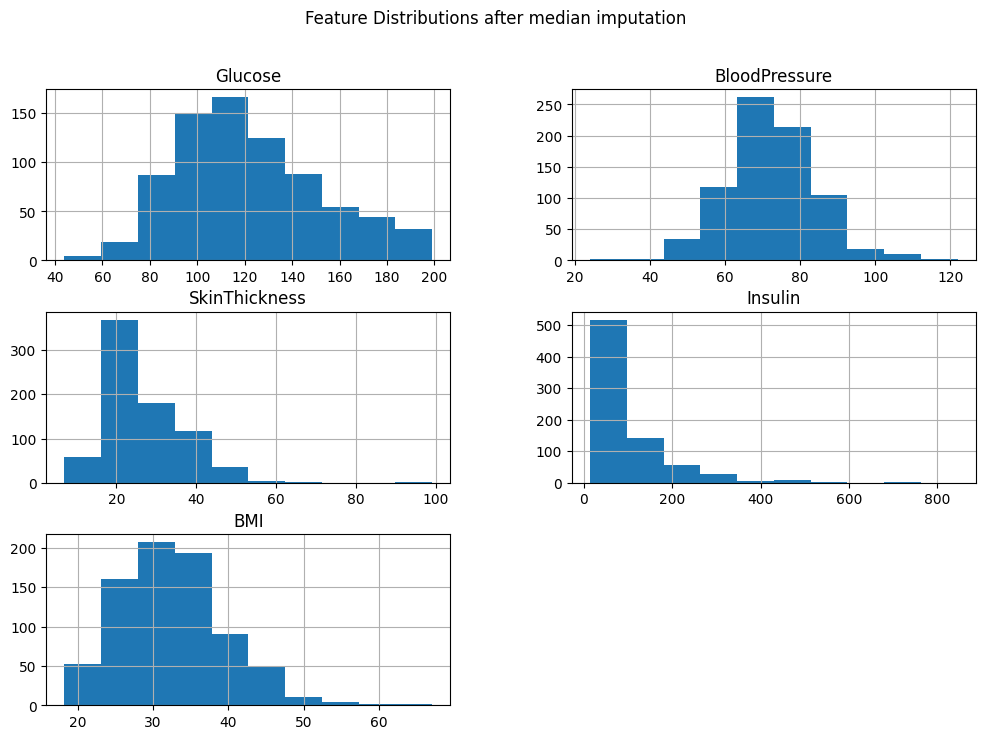

In [108]:
df[zero_columns].hist(figsize=(12,8))
plt.suptitle("Feature Distributions after median imputation")
plt.show()

In [109]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


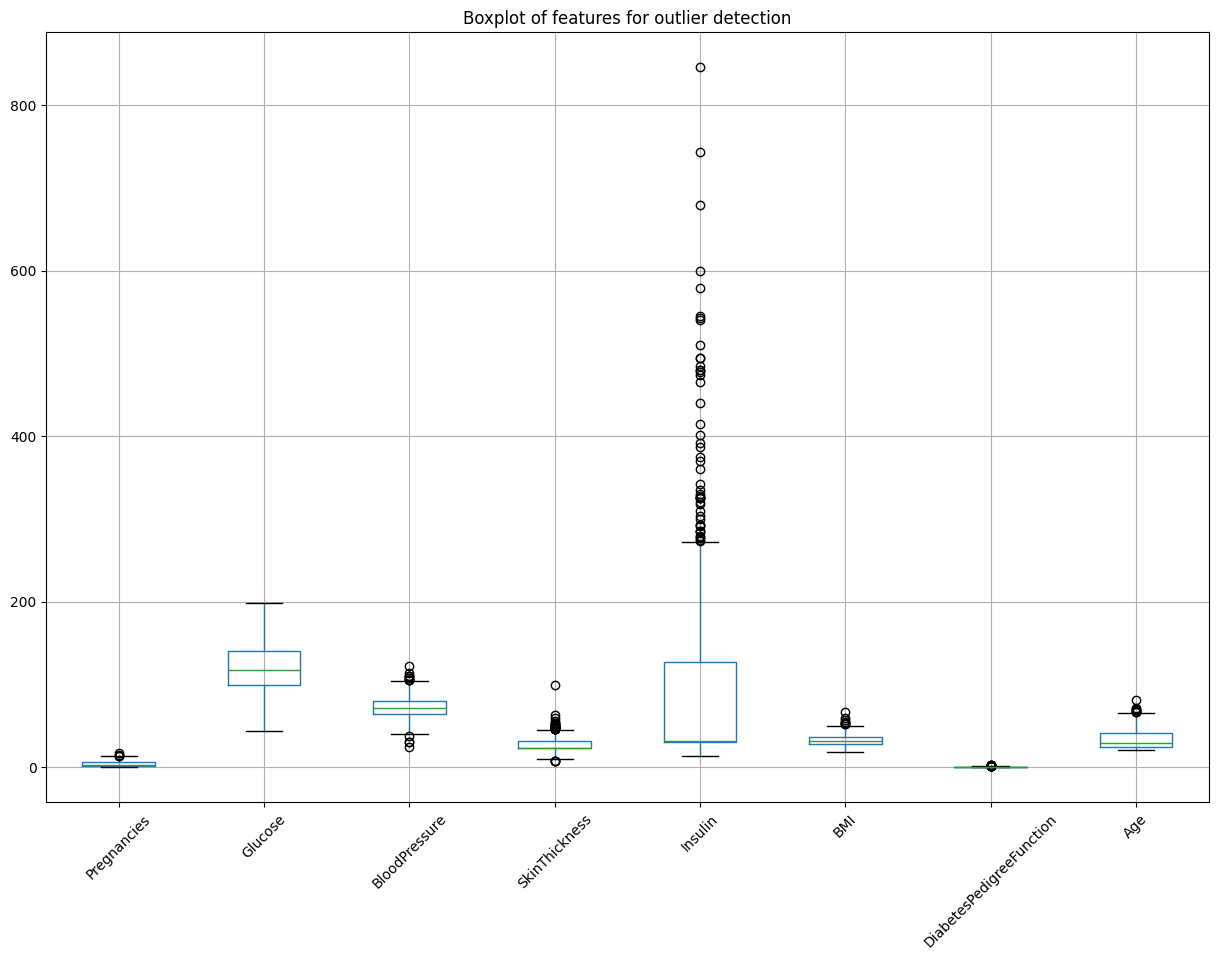

In [111]:
# outlier analysis
plt.figure(figsize=(15,10))
df.drop(columns=['Outcome']).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of features for outlier detection")
plt.show()

In [112]:
df.drop(columns='Outcome').skew().sort_values(ascending=False)

Insulin                     2.693181
DiabetesPedigreeFunction    1.919911
SkinThickness               1.223057
Age                         1.129597
Pregnancies                 0.901674
BMI                         0.601059
Glucose                     0.535587
BloodPressure               0.141885
dtype: float64

In [113]:
skewed_features = ['Insulin', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']
for col in skewed_features:
    df[col] = np.log1p(df[col])

In [114]:
df[skewed_features].skew()

Insulin                     0.762239
SkinThickness              -0.227098
BMI                        -0.035823
DiabetesPedigreeFunction    1.117942
dtype: float64

In [115]:
# feature-target split
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [116]:
# train-test-split
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

In [117]:
# verifying split
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (614, 8)
Testing set size: (154, 8)


In [118]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

In [119]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
# svm model rbf kernel

from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [121]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [123]:
y_pred_rf = rf_model.predict(X_test)

In [124]:
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [125]:
# svm evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print("SVM Performace")
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1 Score: ", svm_f1)
print("\n Classification Report: \n", classification_report(y_test, y_pred_svm))

SVM Performace
Accuracy:  0.7337662337662337
Precision:  0.6444444444444445
Recall:  0.5370370370370371
F1 Score:  0.5858585858585859

 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



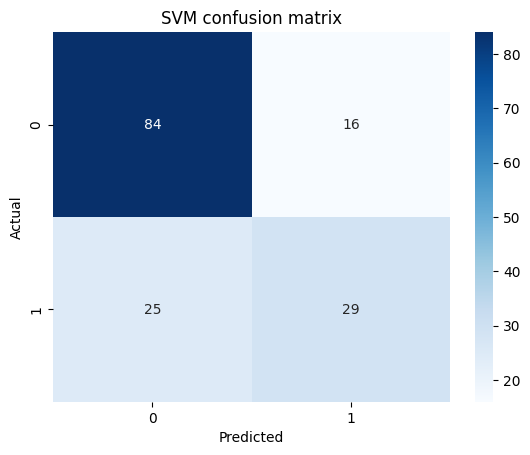

In [126]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm),
            annot=True, fmt="d", cmap="Blues")
plt.title("SVM confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [127]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Performance")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.5925925925925926
F1 Score: 0.6274509803921569

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



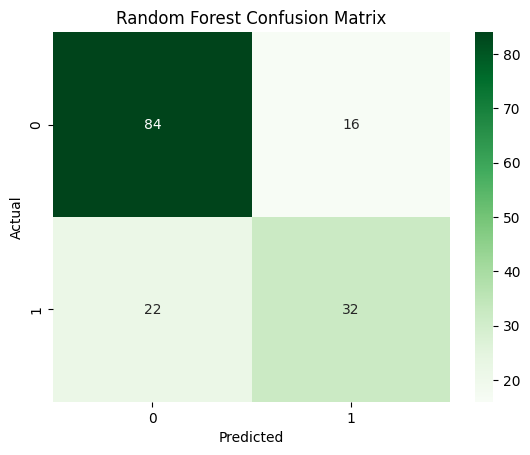

In [128]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [129]:
# model comparision
comparision_df = pd.DataFrame({
    'Model': ['SVM (RBF)', 'Random Forest'],
    'Accuracy': [svm_accuracy, rf_accuracy],
    'Precision': [svm_precision, rf_precision],
    'Recall': [svm_recall, rf_recall],
    'F1 Score': [svm_f1, rf_f1]
})

comparision_df

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (RBF),0.733766,0.644444,0.537037,0.585859
1,Random Forest,0.753247,0.666667,0.592593,0.627451


In [130]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale'],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(
    SVC(),
    svm_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=1
)

svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_

In [ ]:

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [ ]:
# overfitting analysis
svm_train_acc = best_svm.score(X_train_scaled, y_train)
svm_test_acc = best_svm.score(X_test_scaled, y_test)

rf_train_acc = best_rf.score(X_train, y_train)
rf_test_acc = best_rf.score(X_test, y_test)


In [ ]:
pd.DataFrame({
    "Model": ["SVM", "Random Forest"],
    "Train Accuracy": [svm_train_acc, rf_train_acc],
    "Test Accuracy": [svm_test_acc, rf_test_acc]
})


,Model,Train Accuracy,Test Accuracy
0,SVM,0.819218,0.714286
1,Random Forest,0.972313,0.746753


In [ ]:
# final model comparision
final_results = pd.DataFrame({
    'Model': ['SVM Tuned', 'Random Forest Tuned'],
    'Accuracy': [
        accuracy_score(y_test, best_svm.predict(X_test_scaled)),
        accuracy_score(y_test, best_rf.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, best_svm.predict(X_test_scaled)),
        precision_score(y_test, best_rf.predict(X_test))
    ],
    'Recall': [
        recall_score(y_test, best_svm.predict(X_test_scaled)),
        recall_score(y_test, best_rf.predict(X_test))
    ],
    'F1 Score': [
        f1_score(y_test, best_svm.predict(X_test_scaled)),
        f1_score(y_test, best_rf.predict(X_test))
    ]
})

final_results


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM Tuned,0.714286,0.613636,0.500000,0.551020
1,Random Forest Tuned,0.746753,0.653061,0.592593,0.621359
